In [52]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [53]:
def create_quantum_circuit():
    """Create quantum circuit with H gate on q0, X gate on q2, and Fredkin gate on q0,q1,q2"""
    # Create quantum and classical registers
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)
    
    # Apply H gate on q0
    qc.h(qr[0])
    
    # Apply X gate on q2
    qc.x(qr[2])
    
    # Apply Fredkin (CSWAP) gate - controlled swap with q0 as control, q1 and q2 as targets
    qc.cswap(qr[0], qr[1], qr[2])
    
    # Measure all qubits
    qc.measure(qr, cr)
    
    return qc

In [54]:
def test_all_combinations():
    """Test the circuit with all possible input combinations"""
    print("=" * 80)
    print("QUANTUM CIRCUIT ANALYSIS: H(q0), X(q2), FREDKIN(q0,q1,q2)")
    print("=" * 80)
    
    # Get the simulator
    simulator = Aer.get_backend('qasm_simulator')
    
    # Test all 8 possible input combinations (000 to 111)
    results_summary = []
    all_counts = {}
    
    for i in range(8):
        # Convert i to binary representation
        q0_init = (i >> 2) & 1
        q1_init = (i >> 1) & 1
        q2_init = i & 1
        
        # Create circuit
        qr = QuantumRegister(3, 'q')
        cr = ClassicalRegister(3, 'c')
        qc = QuantumCircuit(qr, cr)
        
        # Initialize qubits to desired state
        if q0_init == 1:
            qc.x(qr[0])
        if q1_init == 1:
            qc.x(qr[1])
        if q2_init == 1:
            qc.x(qr[2])
        
        qc.barrier()
        
        # Apply H gate on q0
        qc.h(qr[0])
        
        # Apply X gate on q2
        qc.x(qr[2])
        
        # Apply Fredkin gate
        qc.cswap(qr[0], qr[1], qr[2])
        
        # Measure
        qc.measure(qr, cr)
        
        # Execute
        job = simulator.run(qc, shots=1024)
        result = job.result()
        counts = result.get_counts(qc)
        
        # Store results
        input_state = f"{q0_init}{q1_init}{q2_init}"
        results_summary.append({
            'input': input_state,
            'counts': counts
        })
        all_counts[input_state] = counts
        
        print(f"\nInput State: |{input_state}⟩")
        print(f"Output Distribution:")
        for state, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
            probability = count / 1024 * 100
            print(f"  |{state}⟩: {count}/1024 ({probability:.1f}%)")
    
    return results_summary, all_counts

In [55]:
def visualize_circuit():
    """Create and display the circuit diagram"""
    qc = create_quantum_circuit()
    
    print("\n" + "=" * 80)
    print("CIRCUIT DIAGRAM")
    print("=" * 80)
    print(qc.draw(output='text'))
    
    # Save circuit diagram
    try:
        # Method 1: Direct save
        qc.draw(output='mpl', filename='quantum_circuit_fredkin.png', style='iqp')
        print("✓ Circuit diagram saved as 'quantum_circuit_fredkin.png'")
    except:
        # Method 2: Alternative approach
        try:
            fig = qc.draw(output='mpl', style='iqp')
            fig.savefig('quantum_circuit_fredkin.png', dpi=300, bbox_inches='tight')
            plt.close(fig)
            print("✓ Circuit diagram saved as 'quantum_circuit_fredkin.png'")
        except Exception as e:
            print(f"✗ Could not save circuit diagram: {e}")
    
    return qc

In [56]:
def create_combined_histogram(all_counts):
    """Create a combined histogram for all input combinations"""
    print("\nGenerating combined histogram...")
    
    # Create subplots for all combinations
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    input_combinations = ['000', '001', '010', '011', '100', '101', '110', '111']
    
    for i, input_state in enumerate(input_combinations):
        counts = all_counts[input_state]
        plot_histogram(counts, ax=axes[i], title=f'Input |{input_state}⟩')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('all_histograms_fredkin.png', dpi=300, bbox_inches='tight')
    print("✓ Combined histogram saved as 'all_histograms_fredkin.png'")
    
    return fig

In [57]:
def explain_circuit():
    """Explain how the circuit works"""
    print("\n" + "=" * 80)
    print("CIRCUIT EXPLANATION")
    print("=" * 80)
    print("""
The circuit consists of three operations:

1. H Gate on q0: Creates superposition |0⟩ → (|0⟩ + |1⟩)/√2
   - q0 becomes 50% |0⟩ and 50% |1⟩

2. X Gate on q2: Bit flip |0⟩ → |1⟩, |1⟩ → |0⟩
   - Inverts the state of q2

3. Fredkin Gate (CSWAP) on q0, q1, q2:
   - Control qubit: q0
   - If q0 = |1⟩: swaps q1 and q2
   - If q0 = |0⟩: does nothing
   - Since q0 is in superposition, both operations occur in parallel

Key Insight:
- The Fredkin gate is a controlled SWAP gate
- It swaps q1 and q2 only when q0 is in state |1⟩
- Combined with H gate on q0, this creates quantum superposition effects
- The X gate on q2 ensures interesting entanglement patterns
    """)


CIRCUIT EXPLANATION

The circuit consists of three operations:

1. H Gate on q0: Creates superposition |0⟩ → (|0⟩ + |1⟩)/√2
   - q0 becomes 50% |0⟩ and 50% |1⟩

2. X Gate on q2: Bit flip |0⟩ → |1⟩, |1⟩ → |0⟩
   - Inverts the state of q2

3. Fredkin Gate (CSWAP) on q0, q1, q2:
   - Control qubit: q0
   - If q0 = |1⟩: swaps q1 and q2
   - If q0 = |0⟩: does nothing
   - Since q0 is in superposition, both operations occur in parallel

Key Insight:
- The Fredkin gate is a controlled SWAP gate
- It swaps q1 and q2 only when q0 is in state |1⟩
- Combined with H gate on q0, this creates quantum superposition effects
- The X gate on q2 ensures interesting entanglement patterns
    
QUANTUM CIRCUIT ANALYSIS: H(q0), X(q2), FREDKIN(q0,q1,q2)

Input State: |000⟩
Output Distribution:
  |100⟩: 545/1024 (53.2%)
  |011⟩: 479/1024 (46.8%)

Input State: |001⟩
Output Distribution:
  |001⟩: 512/1024 (50.0%)
  |000⟩: 512/1024 (50.0%)

Input State: |010⟩
Output Distribution:
  |111⟩: 535/1024 (52.2%)
  |110

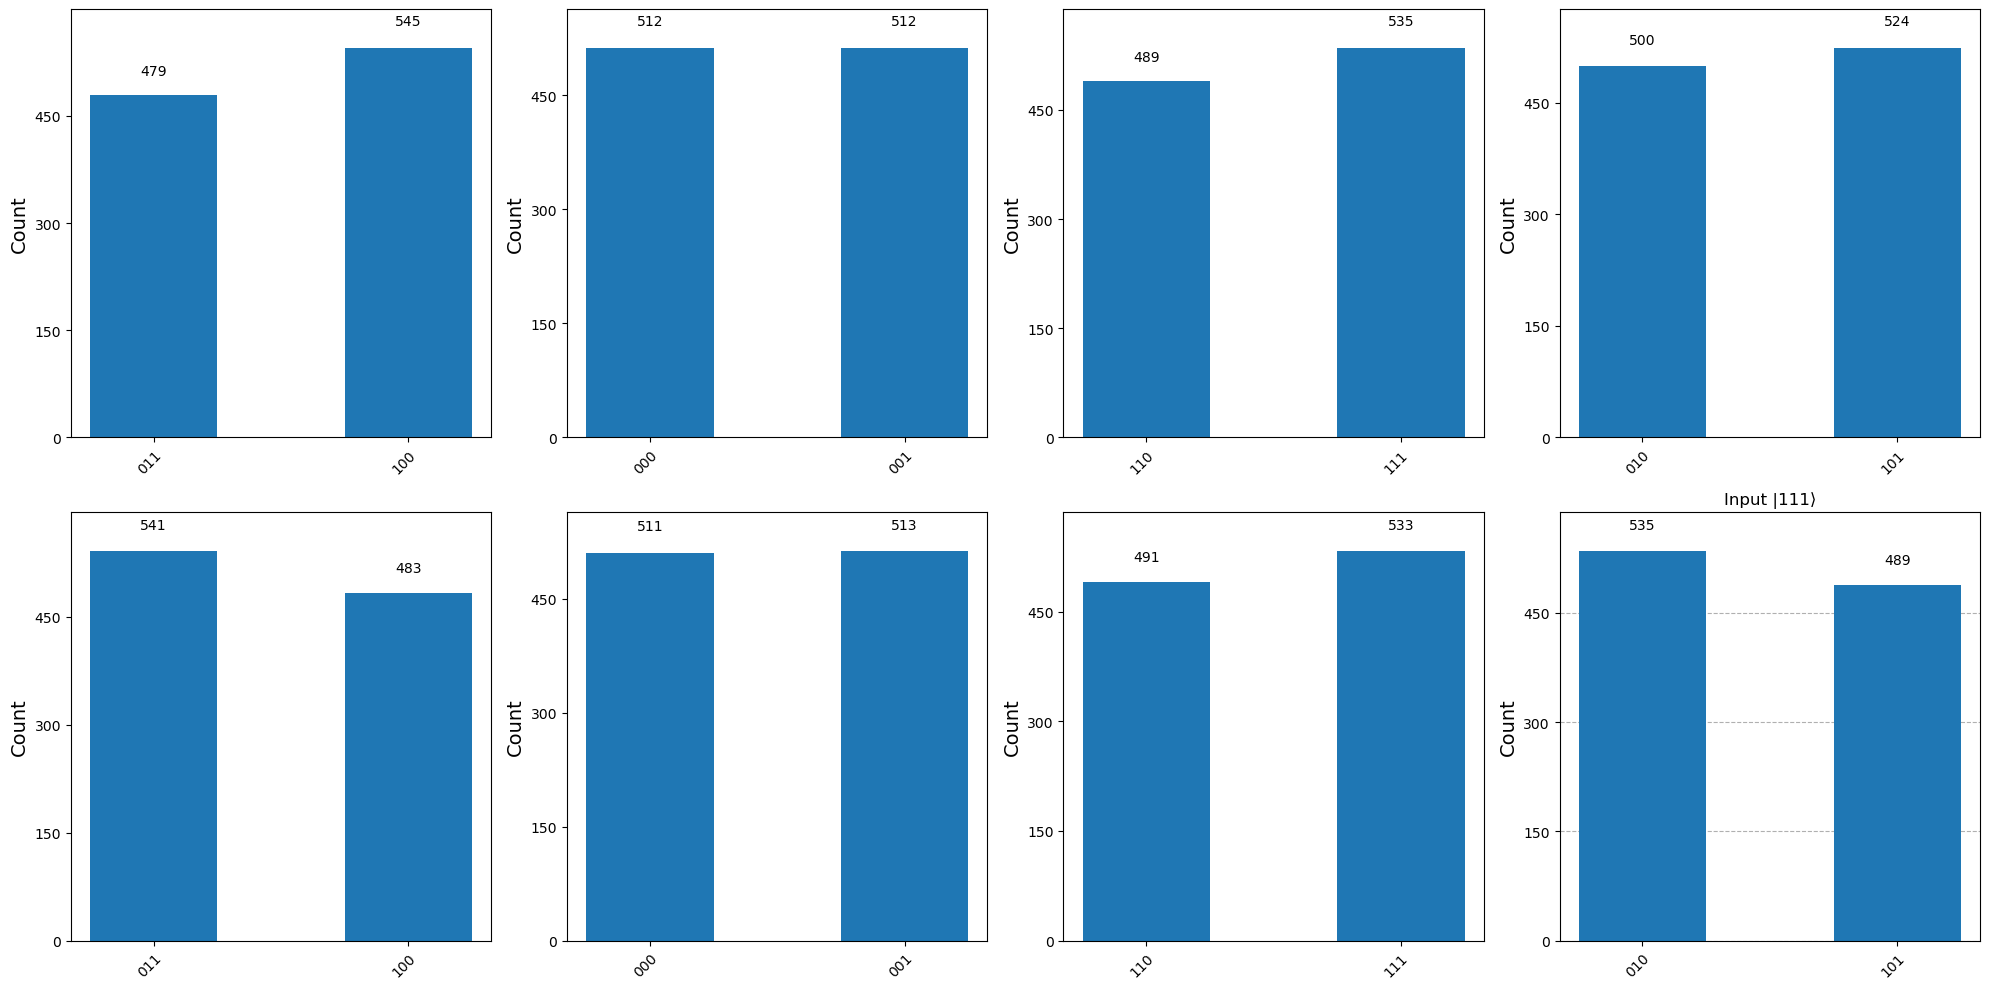


SUMMARY
Circuit successfully created and tested with all input combinations!
The Fredkin gate creates entanglement when q0 is in superposition.
Files saved:
  - quantum_circuit_fredkin.png (Circuit diagram)
  - all_histograms_fredkin.png (Combined histogram)


In [58]:
# Main execution
if __name__ == "__main__":
    # Explain the circuit
    explain_circuit()
    
    # Test all input combinations
    results, all_counts = test_all_combinations()
    
    # Visualize the circuit
    print("\n\nGenerating circuit diagram...")
    circuit = visualize_circuit()
    
    # Create combined histogram
    combined_fig = create_combined_histogram(all_counts)
    
    # Show all plots
    print("\nDisplaying plots...")
    plt.show()
    
    print("\n" + "=" * 80)
    print("SUMMARY")
    print("=" * 80)
    print("Circuit successfully created and tested with all input combinations!")
    print("The Fredkin gate creates entanglement when q0 is in superposition.")
    print("Files saved:")
    print("  - quantum_circuit_fredkin.png (Circuit diagram)")
    print("  - all_histograms_fredkin.png (Combined histogram)")
    print("=" * 80)